In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [11]:
import pandas as pd
import zipfile

# Specify the path to the zip file
zip_file_path = 'C:/Users/samue/Downloads/archive (3).zip'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('extracted_files')

# List the files in the extracted directory
extracted_files = zip_ref.namelist()

# Assuming there's only one CSV file in the zip archive, get its name
csv_file_name = [file for file in extracted_files if file.endswith('.csv')][0]

# Read the CSV file
csv_file_path = f'extracted_files/{csv_file_name}'  # Path to the extracted CSV file
df = pd.read_csv(csv_file_path, encoding='latin-1')

# Display the first few rows of the DataFrame
print(df.head())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [13]:
df = df.rename(columns={"v1":"category","v2": "message"})


In [14]:
df.head()

,category,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [15]:
mapping = {
    "ham":0,
    "spam":1
}
df["category"] = df['category'].map(mapping)

In [17]:
df.head()

,category,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   category    5572 non-null   int64 
 1   message     5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: int64(1), object(4)
memory usage: 217.8+ KB


In [20]:
df.shape

(5572, 5)

In [21]:
df['category'].value_counts()

category
0    4825
1     747
Name: count, dtype: int64

<Axes: ylabel='count'>

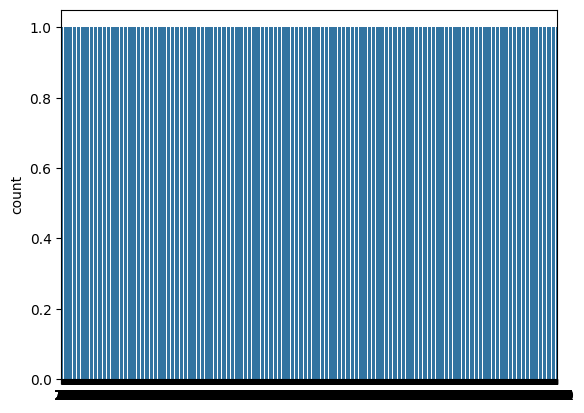

In [22]:
sns.countplot(df["category"])

<h1>Text processing</h1> 

In [23]:
messages = df["message"]


In [24]:
messages

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [27]:
pip install nltk


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/41.9 kB ? eta -:--:--
     ------------------ ------------------- 20.5/41.9 kB 330.3 kB/s eta 0:00:01
     -------------------------------------  41.0/41.9 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 41.9/41.9 kB 253.4 kB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ----------------------------------- ---- 51.2/57.6 kB ? eta -:--:--
     -------------------------------------- 57.6/57.6 kB 751.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.5 MB 6.9 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.5 MB 6.3 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.5 MB 6.6 MB/s eta 0:00:01
   ----------------------------- ---------- 1.1/1.5 MB 6.3 MB/s eta 0:00:01
   ---------

In [28]:
from nltk.tokenize import TweetTokenizer

# Instantiate TweetTokenizer
tk = TweetTokenizer()

# Tokenize the messages and join them back into strings
messages = messages.apply(lambda x: tk.tokenize(x)).apply(lambda x: ' '.join(x))

# Display the messages
print(messages)


0       Go until jurong point , crazy .. Available onl...
1                         Ok lar ... Joking wif u oni ...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor ... U c already then sa...
4       Nah I don't think he goes to usf , he lives ar...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568               Will Ì_ b going to esplanade fr home ?
5569    Pity , * was in mood for that . So ... any oth...
5570    The guy did some bitching but I acted like i'd...
5571                          Rofl . Its true to its name
Name: message, Length: 5572, dtype: object


<h1>Removing special characters</h1>

In [29]:
messages = messages.str.replace('[^a-zA-Z0-9]=','')
messages

0       Go until jurong point , crazy .. Available onl...
1                         Ok lar ... Joking wif u oni ...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor ... U c already then sa...
4       Nah I don't think he goes to usf , he lives ar...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568               Will Ì_ b going to esplanade fr home ?
5569    Pity , * was in mood for that . So ... any oth...
5570    The guy did some bitching but I acted like i'd...
5571                          Rofl . Its true to its name
Name: message, Length: 5572, dtype: object

<h1>Splitting into x and y </h1>

In [30]:
x = messages
y = df["category"]

<h1>Model Building</h1>

In [33]:
from sklearn.model_selection import train_test_split as tis
x_train,x_test,y_train,y_test=tis(x,y,test_size= 0.2, random_state=101)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
feature_ex = TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
x_trainfe = feature_ex.fit_transform(x_train)
x_testfe = feature_ex.transform(x_test)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [35]:
print(x_train)

1398    No did you check ? I got his detailed message now
1084    For me the love should start with attraction ....
1086                 I don't think he has spatula hands !
2655                  Great ! I have to run now so ttyl !
1059    EASTENDERS TV Quiz . What FLOWER does DOT comp...
                              ...                        
4171                              Sorry , I'll call later
599               I'm going out to buy mum's present ar .
1361    Shuhui say change 2 suntec steamboat ? U noe w...
1547    Bishan lar nearer ... No need buy so early cos...
4959                 I want <#> rs da :) do you have it ?
Name: message, Length: 4457, dtype: object


In [36]:
print(x_testfe)

  (0, 7357)	0.2523617267786811
  (0, 7283)	0.19381566463246663
  (0, 6997)	0.2466328616233243
  (0, 6828)	0.22631754222011471
  (0, 6718)	0.26159915748238394
  (0, 5956)	0.2332315132189092
  (0, 5264)	0.3953565821748448
  (0, 4034)	0.22631754222011471
  (0, 3915)	0.26159915748238394
  (0, 3212)	0.21866837637715486
  (0, 2423)	0.22631754222011471
  (0, 1966)	0.2055199562407987
  (0, 368)	0.2523617267786811
  (0, 302)	0.25907716755710164
  (0, 189)	0.34033608898715867
  (1, 5794)	0.6815517744025027
  (1, 3745)	0.5921376883906893
  (1, 1894)	0.4299536449387667
  (2, 6082)	0.2231580744612798
  (2, 5555)	0.189348595987789
  (2, 5483)	0.28535762733414455
  (2, 5096)	0.24120225864891712
  (2, 4637)	0.18825734482963105
  (2, 3506)	0.3058887045703128
  (2, 3391)	0.35004407325554027
  :	:
  (1111, 4041)	0.34704497794295436
  (1111, 3373)	0.3364699812083804
  (1111, 3018)	0.3086141815432873
  (1111, 2935)	0.19768431377790857
  (1111, 2049)	0.3364699812083804
  (1112, 6509)	0.5147019226204883
  (1

In [37]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [38]:
clf.fit(x_trainfe,y_train)

MultinomialNB()

In [39]:
y_pred = clf.predict(x_testfe)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9704035874439462